# Opis

W tym dokumencie porównano wpływ rozdzielczości obrazów na jakość klasyfikacji.

Testy zostały przeprowadzone na powiększonym zbiorze danych. Zbiór zawiera 1000 obrazów dla każdej z czterech klas (obiekty na czarnym tle). W każdym teście dokonano podziału na dane treningowe i testowe za pomocą metody StratifiedKFold z podziałem na 5 podzbiorów. Maksymalny czas treningu zwiększono z 10 do 30 epok. Do testu wykorzystano model oparty o architekturę Xception.

Zbadano następujące rozdzielczości obrazów:
- 71x71 (minimalna rozdzielczość dla architektury Xception)
- 91x91
- 111x111
- 131x131
- 151x151
- 299x299

# Podsumowanie

Najlepszy wynik, 97.725% trafności na zbiorze testowym, otrzymano dla rozdzielczości 131x131.
//todo

# Zależności i definicje

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import math

black_train_results = []
black_test_results = []

n_folds = 5
n_epochs = 30

def compare_train_and_test_acc(data_path, train_results, test_results):
    train_acc = np.loadtxt(data_path + '/training_history.csv', delimiter=',')
    test_acc = np.loadtxt(data_path + '/test_acc.csv', delimiter=',')
    
    best_train_acc_from_folds = np.amax(train_acc, axis=1)
    train_mean = np.mean(best_train_acc_from_folds)
    
    train_results.append(train_mean)
    test_mean = np.mean(test_acc)
    test_results.append(test_acc)
    
    titles = []
    for i in range(n_folds):
        titles.append(f'Fold: {i+1}')
    
    means = ['Mean', train_mean, test_mean]
    df = pd.DataFrame([titles, best_train_acc_from_folds, test_acc], index =['', 'Training ACC', 'Test Acc'])
    df[''] = means
    
    display(df)

def show_confusion_matrix(data_path):
    matrices = []
    for i in range(1, n_folds+1):
        path = f'{data_path}/{i}_fold_confusion_matrix.png'
        img = Image.open(path)
        matrices.append(np.asarray(img))


    col = 1 if n_folds<2 else 2
    row = math.ceil(n_folds / 2) 
    fig = plt.figure(figsize=(20., 30.))
    grid = ImageGrid(fig, 111, 
                     nrows_ncols=(row, col),
                     axes_pad=0.1,
                     )

    for ax, im in zip(grid, matrices):
        ax.imshow(im)
        
    plt.show()
    
def show_training_history(data_path):
    training_history = np.loadtxt(data_path + '/training_history.csv', delimiter=',')
    x = np.arange(1,n_epochs+1)

    for i in range(n_folds):
        plt.plot(x, training_history[i])

    plt.grid()
    plt.title('Model accuracy during training')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.show()# Zależności i definicje <a class="anchor" id="zf"></a>

# Rozdzielczość 71x71

,0,1,2,3,4,
,Fold: 1,Fold: 2,Fold: 3,Fold: 4,Fold: 5,Mean
Training ACC,0.88125,0.887812,0.878438,0.883125,0.893125,0.88475
Test Acc,0.90125,0.88125,0.89625,0.88375,0.88875,0.89025


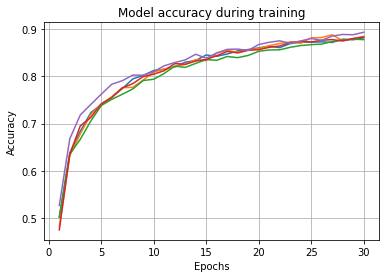

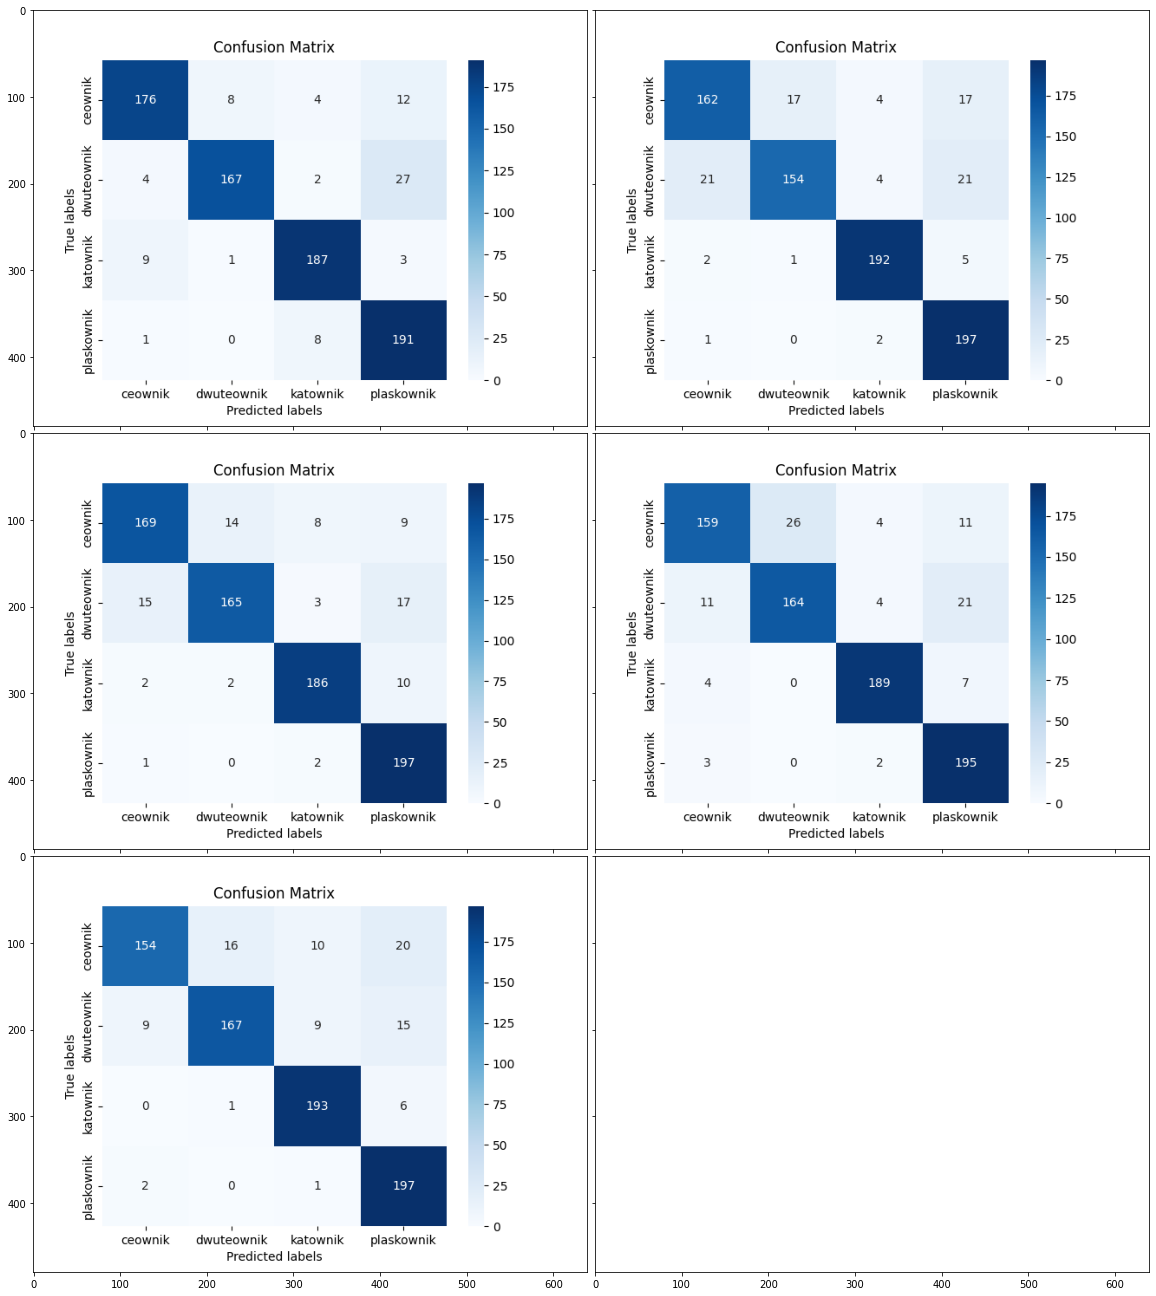

In [2]:
data = 'results/black_background_data_xception_v2_71_71'
compare_train_and_test_acc(data, black_train_results, black_test_results)
show_training_history(data)
show_confusion_matrix(data)

# Rozdzielczość 91x91

,0,1,2,3,4,
,Fold: 1,Fold: 2,Fold: 3,Fold: 4,Fold: 5,Mean
Training ACC,0.93625,0.93375,0.935625,0.940938,0.94,0.937312
Test Acc,0.93625,0.94,0.9425,0.9325,0.93375,0.937


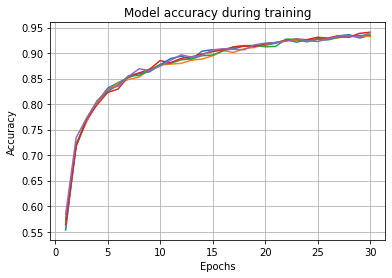

In [3]:
data = 'results/black_background_data_xception_v2_91_91'
compare_train_and_test_acc(data, black_train_results, black_test_results)
show_training_history(data)
#show_confusion_matrix(data)

# Rozdzielczość 111x111

,0,1,2,3,4,
,Fold: 1,Fold: 2,Fold: 3,Fold: 4,Fold: 5,Mean
Training ACC,0.963437,0.96375,0.965625,0.965937,0.963125,0.964375
Test Acc,0.97375,0.965,0.94875,0.96,0.95375,0.96025


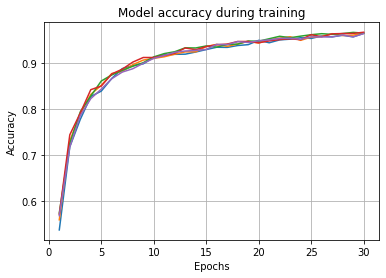

In [4]:
data = 'results/black_background_data_xception_v2_111_111'
compare_train_and_test_acc(data, black_train_results, black_test_results)
show_training_history(data)
#show_confusion_matrix(data)

# Rozdzielczość 131x131

,0,1,2,3,4,
,Fold: 1,Fold: 2,Fold: 3,Fold: 4,Fold: 5,Mean
Training ACC,0.977813,0.975,0.974063,0.969688,0.978437,0.975
Test Acc,0.98625,0.9775,0.975,0.9775,0.97,0.97725


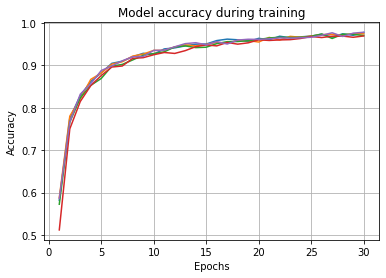

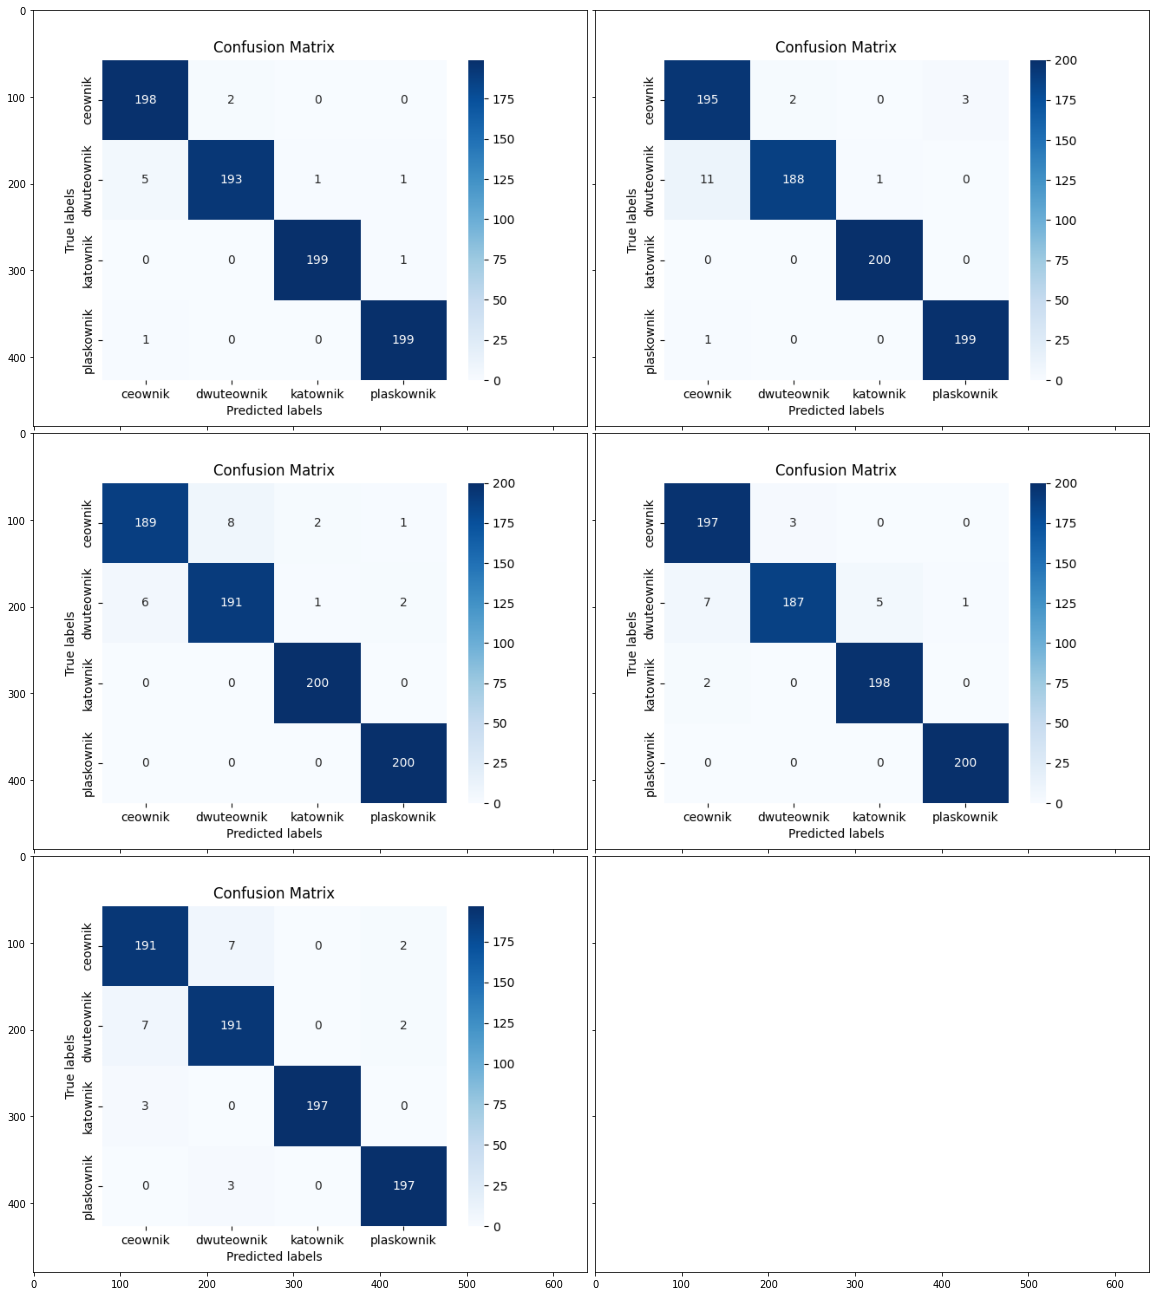

In [5]:
data = 'results/black_background_data_xception_v2_131_131'
compare_train_and_test_acc(data, black_train_results, black_test_results)
show_training_history(data)
show_confusion_matrix(data)

# Rozdzielczość 151x151

,0,1,2,3,4,
,Fold: 1,Fold: 2,Fold: 3,Fold: 4,Fold: 5,Mean
Training ACC,0.971875,0.969063,0.973437,0.965,0.96875,0.969625
Test Acc,0.98,0.98625,0.96125,0.96875,0.96875,0.973


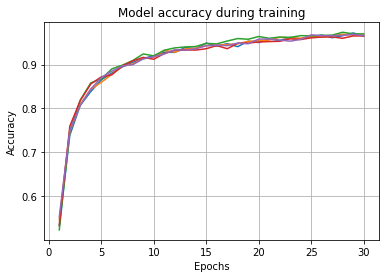

In [6]:
data = 'results/black_background_data_xception_v2_151_151'
compare_train_and_test_acc(data, black_train_results, black_test_results)
show_training_history(data)
#show_confusion_matrix(data)

# Rozdzielczość 299x299

,0,1,2,3,4,
,Fold: 1,Fold: 2,Fold: 3,Fold: 4,Fold: 5,Mean
Training ACC,0.713437,0.773438,0.904063,0.630313,0.770625,0.758375
Test Acc,0.98,0.77375,0.97875,0.98125,0.97375,0.9375


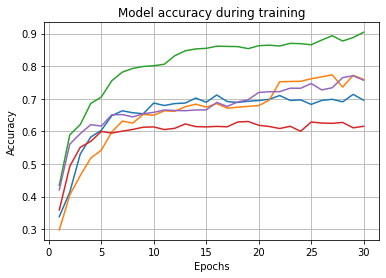

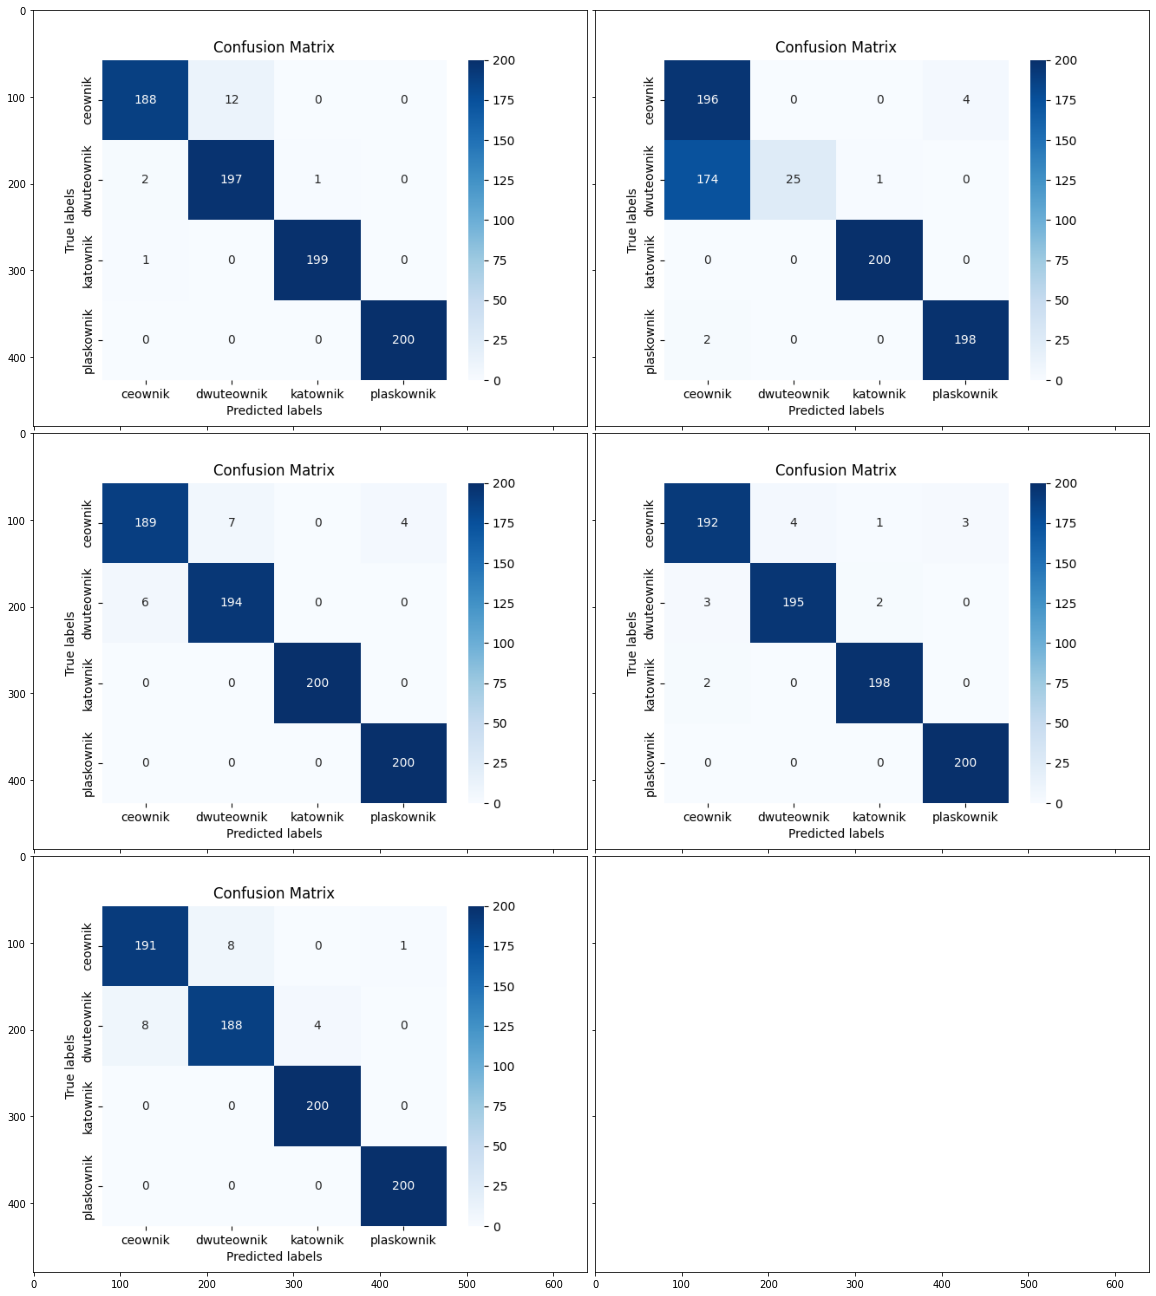

In [7]:
data = 'results/black_background_data_xception_v2_299_299'
compare_train_and_test_acc(data, black_train_results, black_test_results)
show_training_history(data)
show_confusion_matrix(data)

# Porównanie rozdzielczości

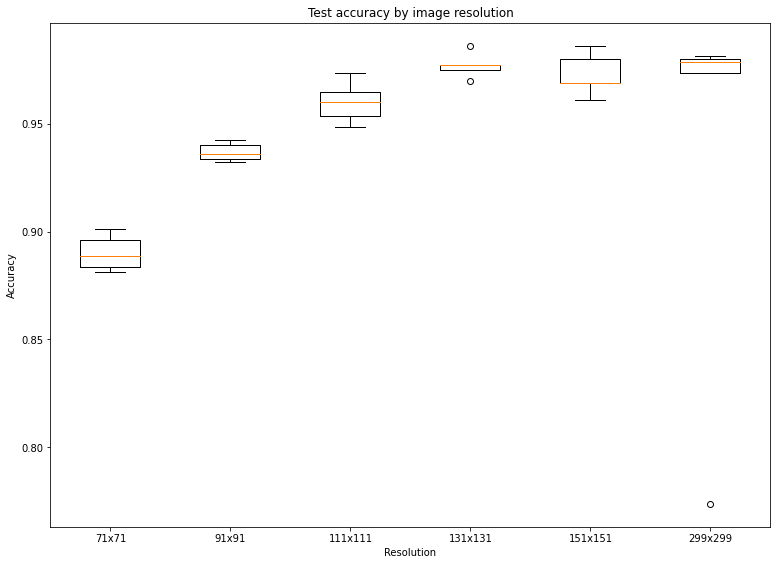

In [8]:
data = black_test_results
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_title('Test accuracy by image resolution')
ax.set_xlabel('Resolution')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(['71x71','91x91','111x111','131x131','151x151','299x299'])
plt.show()